# 【章末テスト - 問題 notebook】 分析レポート - ホテル Web レビューの分析

本ノートブックでは、章末テストとして、ホテル Web レビューの分析のレポーティングを行います。  
実際のレポーティングでは、pptx や word などを使用して行うものですが、今回は簡易的に ipynb を使用して実装とともにレポーティングを行い、最終的に PDF で出力を行います。  

分析レポートの実施方法については、以下の資料をご確認ください。  

▼ [分析レポートの作成手順](https://colab.research.google.com/drive/1DGvXx3ynLL_7rIRDKPzQ1rsWTlv-Hw1J)

本レポートは以下の構成です。  

- イントロダクションパート
- メインパート
- まとめパート  

※ テストの回答を行うために、本ノートブックをダウンロードして、自身の Google Drive にアップロードして実装してください。  
**ファイル > ドライブにコピーを保存**とすると、自身の Google Drive に保存できます。    

---



## イントロダクションパート  
イントロダクションは以下の内容について記載する。  

1. 分析が必要になった背景と目的
2. 分析で使用するデータ
3. 分析で設定された課題と分析の結果  

### 1. 分析が必要になった背景と目的

#### 分析が必要になった背景  

分析が必要になった背景は以下である。  
以下の下、先述したように**満足度に寄与する要因を特定し、満足度向上のための施策を考えること**を分析の具体的な方針とする。 

<img src='https://www.kikagaku.ai/img/benesse-i-career/04/00_07.png'>  

#### 分析の目的

**自社保有のデータから顧客の満足度に寄与している要因を見つけ出し、満足度向上のための施策を考え、リピート顧客を増やすこと**を分析の具体的な方針とし、具体的な施策をホテルを管轄しているマネージャーに提案を行うことを目的とする。提案に際して、本分析レポートを提出する。  

なお、過去の同系列ホテルの実績から**顧客のリピート数は満足度が高いほど頻度が多いことが分かっている**とする。  





### 2. 今回使用するデータ
分析には、以下のデータを使用する。   

▼ [hotel_reviews.csv](https://drive.google.com/file/d/1Sib9dgS_mmbShkL5VHbLGwOUbEIWLhhk/view?usp=sharing)

このデータは、サンプルサイズ 10000、カラム数 14 含まれるデータである。  

<img src='https://www.kikagaku.ai/img/benesse-i-career/04/00_09.png'>  

データ内の変数は以下のようなものが含まれる。  

|  変数  |  詳細  |
| ---- | ---- |
|  性別  |  男性・女性の 2 値  |
|  年齢  |  7 ~ 80 歳までの年齢  |
|  個人/グループ  |  旅行の形態。個人またはグループのどちらか  |
|  旅行の目的  |  学生・ビジネス・航空関係・旅行・その他の 5 種類  |
|  Wifi 設備  |  0 ~ 5 の 6 段階評価（ただし 0 の回答はなし）  |
|  送迎の便利さ  |  0 ~ 5 の 6 段階評価  |
|  オンライン予約のしやすさ  |  0 ~ 5 の 6 段階評価  |
|  ホテルの立地  |  0 ~ 5 の 6 段階評価（ただし 0 の回答はなし）  |
|  食事の満足度  |  0 ~ 5 の 6 段階評価  |
|  滞在時の快適さ  |  0 ~ 5 の 6 段階評価（ただし 0 の回答はなし）  |
|  チェックイン・アウトの接客  |  0 ~ 5 の 6 段階評価（ただし 0 の回答はなし）  |
|  その他のサービス  |  0 ~ 5 の 6 段階評価（ただし 0 の回答はなし）  |
|  清潔さ  |  0 ~ 5 の 6 段階評価  |
|  満足度  |  0 ~ 5 の 6 段階評価（ただし 0 の回答はなし）  |　　

今回分析全体の目的変数として**満足度**を使用し、その他の変数は説明変数として扱う。  

### 3. 分析で設定された課題と分析の結果  

本分析では、hotel_reviews.csv を使用して、顧客の満足度に寄与している要因を見つけ出し、満足度向上のための施策を考え、リピート顧客を増やすことを目的として分析を行う。  
データ分析の結論として以下の実施を提案する。  

- 個人用客室の Wifi 設備の確認と必要に応じて通信設備の見直し  
- 滞在時の快適さに関する追加分析  
- 食事の満足度と清潔さに関する追加分析  



## メインパート

メインパートでは、以下について記載する。  

1. 代表値の比較  
2. 相関分析と重回帰分析による要因の特定  
3. クラスタリングよる対象の絞り込みと比較  
4. 主成分分析による可視化  
5. クラスタの代表値の比較による要因の特定と施策の考案    



In [ ]:
# 環境の準備 : 実行してください
!pip install -q japanize_matplotlib

In [ ]:
# 環境の準備 : 実行してください
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import japanize_matplotlib
from scipy import stats
import statsmodels.api as sm

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
plt.style.use('bmh')

plt.rcParams['figure.figsize'] = 10, 8

In [ ]:
# 環境の準備 : hotel_reviews.csv をアップロードして実行してください
import pandas as pd
df = pd.read_csv('hotel_reviews.csv')

### 定性的な代表値の比較  
→ 該当する問題：**Q 1**  

In [ ]:
# 定性的なデータの確認（代表値の確認）
df.describe(include="all")


,性別,年齢,個人/グループ,旅行の目的,Wifi設備,送迎の便利さ,オンライン予約のしやすさ,ホテルの立地,食事の満足度,滞在時の快適さ,チェックイン・アウトの接客,その他のサービス,清潔さ,満足度
count,10000,10000.000000,10000,10000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
unique,2,NaN,2,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,女性,NaN,グループ,旅行,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,5031,NaN,6798,3041,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,39.486800,NaN,NaN,2.814000,3.104400,2.841000,2.989100,3.20040,3.438700,3.293900,3.646200,3.281900,3.201900
std,NaN,15.175528,NaN,NaN,1.248984,1.482404,1.331201,1.274654,1.32658,1.316441,1.261936,1.168829,1.310116,0.967176
min,NaN,7.000000,NaN,NaN,1.000000,0.000000,0.000000,1.000000,0.00000,1.000000,1.000000,1.000000,0.000000,1.000000
25%,NaN,27.000000,NaN,NaN,2.000000,2.000000,2.000000,2.000000,2.00000,2.000000,2.000000,3.000000,2.000000,3.000000
50%,NaN,40.000000,NaN,NaN,3.000000,3.000000,3.000000,3.000000,3.00000,4.000000,3.000000,4.000000,3.000000,3.000000
75%,NaN,51.000000,NaN,NaN,4.000000,4.000000,4.000000,4.000000,4.00000,5.000000,4.000000,5.000000,4.000000,4.000000


＜答えのまとめ＞

・変数「性別」の男女の数はさほど差異なし

・変数「個人・グループ」は「グループ」の方が多い

・変数「年齢」について、平均は22歳以上の年齢

・変数「満足度」の平均は3．2（小数第二位まで）


### 相関分析と重回帰分析による要因の特定
#### 相関分析  
→ 該当する問題：**Q 2**  

以下、χ検定を行い、関連性を調べる。

①集計・可視化（探索的データ分析）

②仮説立て

③仮説が正しいかの確認（確証的データ分析）

以下、「満足度」と「滞在時の快適さ」

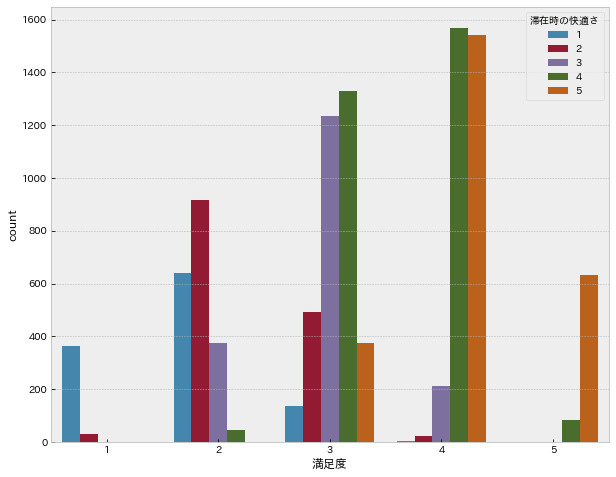

In [ ]:
# 相関分析（満足度と滞在時の快適さ）

#集計・可視化
sns.countplot(x = "満足度", hue = "滞在時の快適さ", data = df);

In [ ]:
#代表値（平均値・中央値）の確認
group = df.groupby("滞在時の快適さ")
group["満足度"].agg(["mean", "median"])

,mean,median
滞在時の快適さ,,
1,1.805263,2.0
2,2.344969,2.0
3,2.911684,3.0
4,3.558532,4.0
5,4.101097,4.0


In [ ]:
#仮説立て　･･･今回は、Wifi設備と滞在時の快適さは独立ではなく、何らかの関連性がある

・χ二乗検定により、仮説が正しいか検証

　ー帰無仮説：２群間は独立

　ー対立仮説：２群間は何らかの関連性がある

・有意水準
　
　ー5％

・p値

#※χ二乗検定を行うため、cross集計表を用意する

In [ ]:
#クロス集計表の用意
crosstab = pd.crosstab(df["満足度"], df["滞在時の快適さ"])
crosstab

滞在時の快適さ,1,2,3,4,5
満足度,,,,,
1,363,30,0,0,0
2,639,918,374,44,1
3,135,492,1236,1329,374
4,3,21,213,1569,1543
5,0,0,0,82,634


In [ ]:
#χ二乗検定
chi2, p, dof, ef = stats.chi2_contingency(crosstab, correction= False)
p

0.0

・判定結果

　･･･求めたp値は、有意水準より低いため、帰無仮説を棄却し、Wifi設備と満足度に関連性がある！！！

以下、「満足度」と【清潔さ】

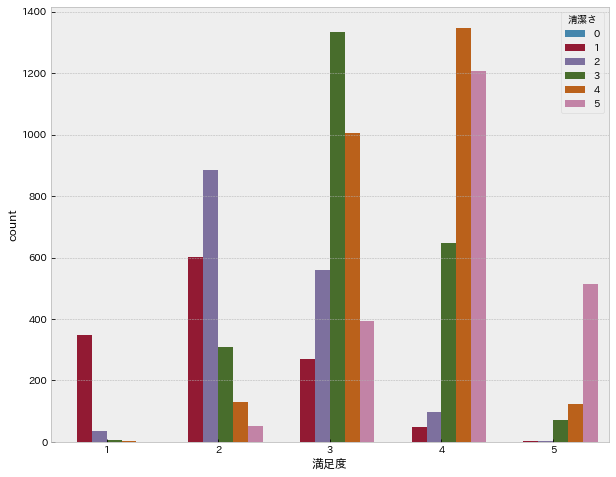

In [ ]:
#滞在時の快適さ（満足度と清潔さ）

#集計・可視化
sns.countplot(x = "満足度", hue = "清潔さ", data = df);

In [ ]:
#代表値（平均値・中央値）の確認
group = df.groupby("清潔さ")
group["満足度"].agg(["mean", "median"])

,mean,median
清潔さ,,
0,3.000000,3.0
1,2.024371,2.0
2,2.459785,2.0
3,3.197385,3.0
4,3.561518,4.0
5,4.005535,4.0


In [ ]:
#仮説立て　･･･今回は、Wifi設備と清潔さは独立ではなく、何らかの関連性（有意性）がある

・χ二乗検定により、仮説が正しいか検証

　ー帰無仮説：２群間は独立

　ー対立仮説：２群間は何らかの関連性がある

・有意水準
　
　ー5％

・p値

#※χ二乗検定を行うため、cross集計表を用意する

In [ ]:
#クロス集計表の用意
crosstab2 = pd.crosstab(df["満足度"], df["清潔さ"])
crosstab2

清潔さ,0,1,2,3,4,5
満足度,,,,,,
1,0,348,35,7,2,1
2,0,601,884,310,129,52
3,1,270,561,1335,1005,394
4,0,50,97,646,1348,1208
5,0,3,2,73,125,513


In [ ]:
#χ二乗検定
chi2, p, dof, ef = stats.chi2_contingency(crosstab2, correction= False)
p

0.0

・判定結果

　･･･求めたp値は、有意水準より低いため、帰無仮説を棄却し、Wifi設備と満足度に関連性がある！！！

<Axes: >

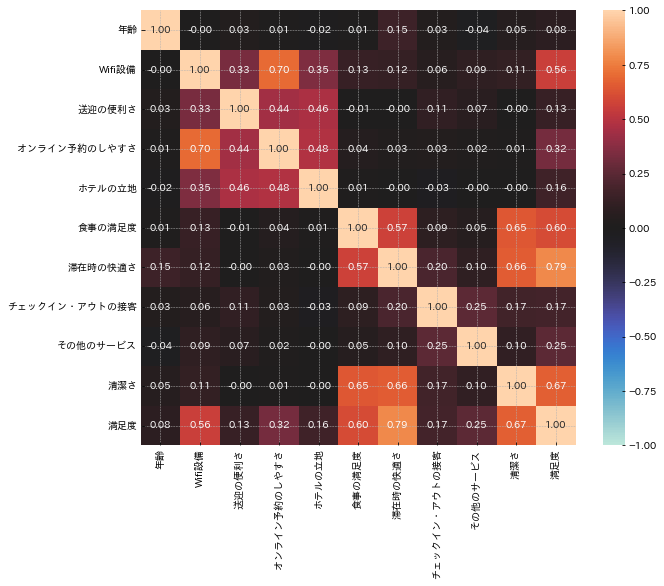

In [ ]:
# `満足度`との相関が高い変数を確認する  
sns.heatmap(df.corr(method='spearman'), annot=True, square=True, vmax=1, vmin=-1, center=0, fmt='.2f')

In [ ]:
# 無相関検定による統計的有意性の確認  

print(f'滞在時の快適さ ✕ 満足度:{stats.spearmanr(df["滞在時の快適さ"], df["満足度"])}')
print(f'清潔さ ✕ 満足度:{stats.spearmanr(df["清潔さ"], df["満足度"])}')
print(f'食事の満足度 ✕ 満足度:{stats.spearmanr(df["食事の満足度"], df["満足度"])}')
print(f'Wifi設備 ✕ 満足度:{stats.spearmanr(df["Wifi設備"], df["満足度"])}')

滞在時の快適さ ✕ 満足度:SignificanceResult(statistic=0.7886695703694965, pvalue=0.0)
清潔さ ✕ 満足度:SignificanceResult(statistic=0.6674895996550014, pvalue=0.0)
食事の満足度 ✕ 満足度:SignificanceResult(statistic=0.6021781087989913, pvalue=0.0)
Wifi設備 ✕ 満足度:SignificanceResult(statistic=0.5613474726971944, pvalue=0.0)


＜答えのまとめ＞

・変数「年齢」はその他の変数との相関が低い。よって、満足度には関連性がない。

・変数「wifi設備」「送迎の便利さ」「オンライン予約のしやすさ」「ホテルの立地」は互いに3.0～0.7ぐらいの相関係数

・変数「食事の満足度」「滞在時の快適さ」「清潔さ」は互いに0.5～0.7ぐらいの相関係数

・変数「満足度」と、「滞在時の快適さ」「清潔さ」「食事の満足度」の順で相関が高い

・変数「チェックイン・アウトの接客」「その他のサービス」はその他の変数との相関が低い。よって、関連性の低い変数。

・変数「滞在時の快適さ」「清潔さ」「食事の満足度」「wifi設備」は満足度が変動する関連性の高い変数（p値が有意水準より低い）




#### 重回帰分析  
→ 該当する問題：**Q 3**  

In [ ]:
# 変数の選択: 目的変数→満足度、入力変数→年齢と満足度以外の数値データ  

#数値データのみを取得
df.select_dtypes(include= "object")

#数値化 ･･･ one hot encording の場合
_df = pd.get_dummies(df, drop_first= True)

#データの分割
x = _df.drop("満足度", axis=1)
y = _df["満足度"]

・数値化

※ drop_first = True

･･･この引数がないと、上記表に「性別ー男性」「性別ー女性」という2列が生じる。 　この2列は性別（というカテゴリカル変数）に新しく数値を割り当てたものだが、「ここでの1 or 0」ということに意味は無い（無駄に2列ある）。 　よって、drop_first = True によって、一列にした。

　これにより、

　・性別の所が「1」である->男性

　・性別の所が「0」である->女性

　という区別が可能となった。

In [ ]:
# 変数の標準化  

#標準化
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

#インスタンス化
x_scaled = scaler.fit_transform(x)

In [ ]:
#出力される型の変更　･･･ pandasのDataFrame型へ
feature = pd.DataFrame(x_scaled, columns=_df.drop("満足度", axis=1).columns)

# pd.DataFrame(標準化したオブジェクト, columns = 分割したデータ.columns)

# 分割したデータ.columns　･･･　落とした所のうち、「カラム名だけ」取得する

In [ ]:
# 重回帰分析を実行  

np.random.seed(0) # 乱数の固定
multi_ols = sm.OLS(y, sm.add_constant(feature))
result = multi_ols.fit()

In [ ]:
# 分析結果の表示   

result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    満足度   R-squared:                       0.917
Model:                            OLS   Adj. R-squared:                  0.917
Method:                 Least Squares   F-statistic:                     6930.
Date:                Fri, 24 Mar 2023   Prob (F-statistic):               0.00
Time:                        17:15:59   Log-Likelihood:                -1386.0
No. Observations:               10000   AIC:                             2806.
Df Residuals:                    9983   BIC:                             2929.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             3.2019      0.003   1151.022      0.000       3.196       3.207
年齢               -0.0036      0.003     -1.271      0.204      -0.009       0.002
Wifi設備            0.4633      0.004    117.969      0.000       0.456       0.471
送迎の便利さ           -0.0154      0.004     -4.333      0.000      -0.022      -0.008
オンライン予約のしやすさ     -0.0345      0.004     -8.011      0.000      -0.043      -0.026
ホテルの立地            0.0117      0.003      3.464      0.001       0.005       0.018
食事の満足度            0.1147      0.004     29.853      0.000       0.107       0.122
滞在時の快適さ           0.5276      0.004    132.126      0.000       0.520       0.535
チェックイン・アウトの接客    -0.0299      0.003    -10.165      0.000      -0.036      -0.024
その他のサービス          0.1433      0.003     49.432      0.000       0.138       0.149
清潔さ               0.1590      0.004     37.565      0.000       0.151       0.167
性別_男性             0.0007      0.003      0.252      0.801      -0.005       0.006
個人/グループ_個人       -0.0247      0.003     -7.986      0.000      -0.031      -0.019
旅行の目的_ビジネス        0.0008      0.004      0.188      0.851      -0.008       0.010
旅行の目的_学生         -0.0039      0.005     -0.839      0.402      -0.013       0.005
旅行の目的_旅行          0.0024      0.005      0.489      0.625      -0.007       0.012
旅行の目的_航空関係       -0.0053      0.004     -1.290      0.197      -0.013       0.003
==============================================================================
Omnibus:                     3087.589   Durbin-Watson:                   2.030
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              465.976
Skew:                           0.044   Prob(JB):                    6.52e-102
Kurtosis:                       1.946   Cond. No.                         4.60
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
#自由度調整済み決定係数
result.rsquared_adj

0.917274893983254

In [ ]:
#説明変数とt値・p値、標準編回帰係数のデータフレームを作成
res_values = pd.DataFrame([result.tvalues[1:], result.pvalues[1:], result.params[1:]],
             index = ["t", "p", "coef"]).T

# pd.DataFrame( [実行済み.tvalues, 実行済み.pvalues,　実行済み.params],
#               index = ["t", "p", "coef"]).T

In [ ]:
res_values

,t,p,coef
年齢,-1.270955,2.037742e-01,-0.003611
Wifi設備,117.969420,0.000000e+00,0.463290
送迎の便利さ,-4.332754,1.486964e-05,-0.015414
オンライン予約のしやすさ,-8.011477,1.260010e-15,-0.034454
ホテルの立地,3.464405,5.336381e-04,0.011694
食事の満足度,29.853107,1.196351e-187,0.114661
滞在時の快適さ,132.125668,0.000000e+00,0.527593
チェックイン・アウトの接客,-10.164707,3.735465e-24,-0.029936
その他のサービス,49.432387,0.000000e+00,0.143318
清潔さ,37.565036,5.530474e-289,0.159023


#・重回帰分析における「重要な説明変数」の確認

①ｔ値の絶対値が 2以上。

②ｐ値が 5％以下。（有意水準以下のもの）

In [ ]:
#t値の絶対値が2以上、p値が5%以下･･･という条件での選別
res_values[ (res_values["t"].abs() >= 2.0 ) & (res_values["p"] < 0.05) ].sort_values("t", ascending = False)

# .sort_values( "基準にする値", ascending = False ) ･･･上記の場合、t値が高い順に並び替え

,t,p,coef
滞在時の快適さ,132.125668,0.000000e+00,0.527593
Wifi設備,117.969420,0.000000e+00,0.463290
その他のサービス,49.432387,0.000000e+00,0.143318
清潔さ,37.565036,5.530474e-289,0.159023
食事の満足度,29.853107,1.196351e-187,0.114661
ホテルの立地,3.464405,5.336381e-04,0.011694
送迎の便利さ,-4.332754,1.486964e-05,-0.015414
個人/グループ_個人,-7.985699,1.551319e-15,-0.024688
オンライン予約のしやすさ,-8.011477,1.260010e-15,-0.034454
チェックイン・アウトの接客,-10.164707,3.735465e-24,-0.029936


In [ ]:
#相関係数
tmp = df.corr()["満足度"]
tmp[tmp.abs() > 0.5].sort_values(ascending = False)

満足度        1.000000
滞在時の快適さ    0.793672
清潔さ        0.678053
食事の満足度     0.612857
Wifi設備     0.575273
Name: 満足度, dtype: float64

↑より、満足度に影響を大きく及ぼす（少なくとも0.5以上）相関係数を出力できる。

ー滞在時の快適さ

ーWifi設備

ー清潔さ

ー食事の満足度

･･･これらが「満足度」（という目的変数）を向上させるのに効果的な要素（説明変数）だと考えられる。

＜答えのまとめ＞

・変数「滞在時の快適さ」「wifi設備」「その他サービス」「清潔さ」「食事の満足度」の順で重要度が高い

・相関分析結果と合わせ、「滞在時の快適さ」「wifi設備」「清潔さ」「食事の満足度」は重要な変数と判断できる

### クラスタリングよる対象の絞り込みと比較

→ 該当する問題：**Q 4**  

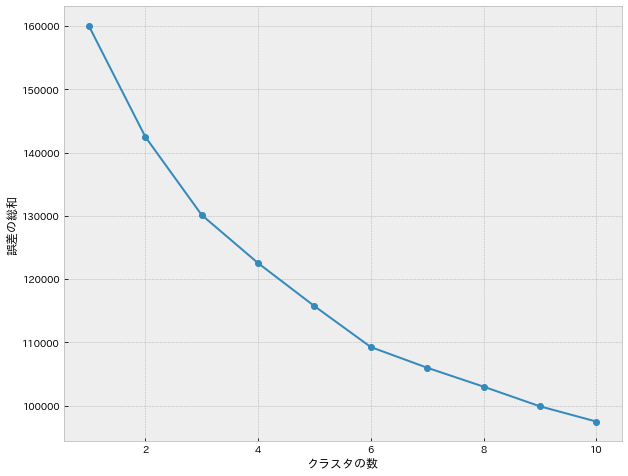

In [ ]:
# クラスタリング : エルボー法による最適なクラスタ数の計算  

from sklearn.cluster import KMeans

sse = []

for i  in range(1,11):                
    kmeans = KMeans(
        n_clusters=i,
        n_init=10,
        random_state=0
        )
    
    kmeans.fit(x_scaled)             
    sse.append(kmeans.inertia_)   

plt.plot(range(1,11), sse , marker='o')
plt.xlabel('クラスタの数')
plt.ylabel('誤差の総和')
plt.show()

↑クラスタ3において、やや折れ曲がり具合が激しくなっていると見れる。

以下、クラスタ0～2までの3つを対象とする。

In [ ]:
# クラスタリングの実行 : エルボー法で最適なクラスタ数を指定して実装してください。   

#クラスタ数 3 でクラスタリングを実行
kmeans = KMeans(n_clusters=3, random_state=0)

kmeans.fit(x_scaled)

cluster = kmeans.labels_
cluster

array([0, 1, 1, ..., 0, 0, 2], dtype=int32)

In [ ]:
# 実行してください  
df_clustering = df.copy() # df のデータをコピー

In [ ]:
# 変数名 `cluster` で df_clustering にクラスタリングの結果を追加

# 標準化前のデータに、cluster・満足度のカラム追加
df_clustering['cluster'] = cluster
df_clustering.head(2)

,性別,年齢,個人/グループ,旅行の目的,Wifi設備,送迎の便利さ,オンライン予約のしやすさ,ホテルの立地,食事の満足度,滞在時の快適さ,チェックイン・アウトの接客,その他のサービス,清潔さ,満足度,cluster
0,女性,50,グループ,学生,4,4,4,4,3,4,4,4,4,4,0
1,女性,35,個人,ビジネス,4,5,4,4,1,1,5,4,1,2,1


In [ ]:
# 変数 `cluster` 毎に groupby() でまとめる  

groups = df_clustering.groupby("cluster")
groups.size()

cluster
0    3614
1    3231
2    3155
dtype: int64

※↑主成分は2つのみ。

均等に近い位の数に分割できている。

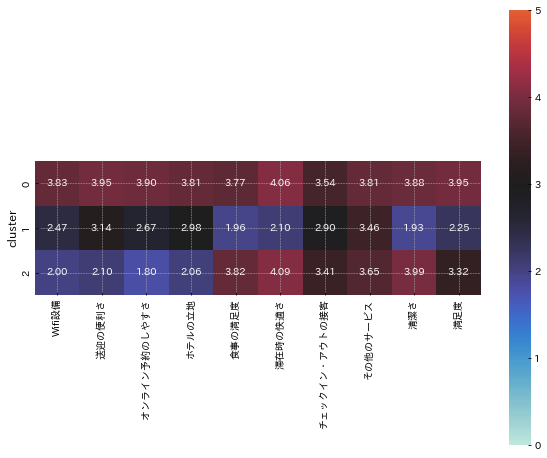

In [ ]:
# クラスタ毎の各項目の代表値を見る（中央値）: 変数`年齢`は省く
median = groups.mean().drop('年齢', axis=1)

sns.heatmap(
    median,
    annot=True,
    square=True,
    vmin=0.0,
    vmax=5.0,
    center=3.0,
    fmt='.2f'
    );

↑より、

・クラスタ0･･･全体的に評価が高い

・それ以外のクラスタ･･･項目ごとに高低差が見られる。

以上ヒートマップにて、その原因を可視化。

※上記にて平均値を対象とし、余計なもの（年齢）を省く。

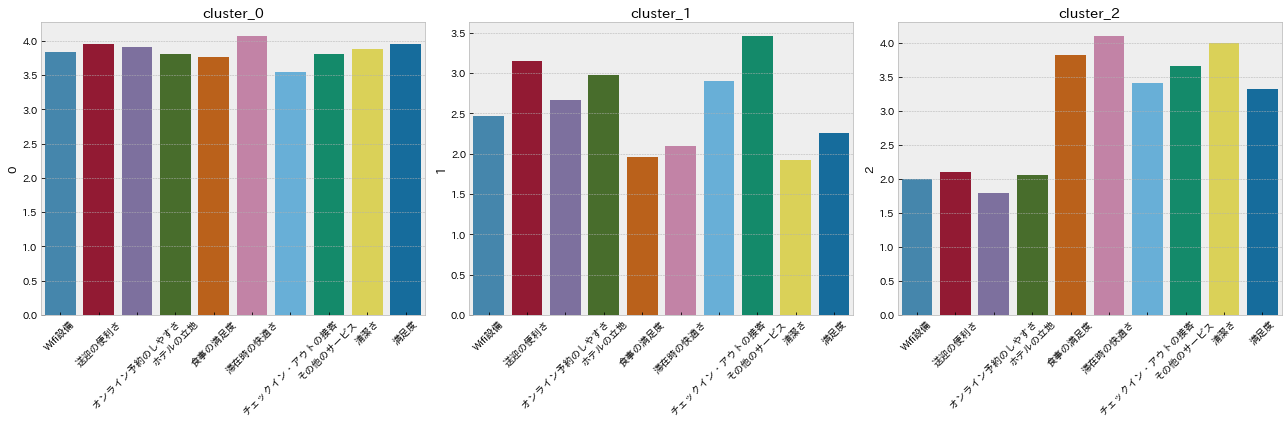

In [ ]:
# 実行してください  
num = kmeans.n_clusters

plt.figure(figsize=(18, 6))

for n in range(num):
    plt.subplot(1, 3, n+1)
    plt.title(f'cluster_{n}')
    sns.barplot(x=median.columns, y=median.loc[n])
    plt.xticks(rotation=45)
    plt.tight_layout()

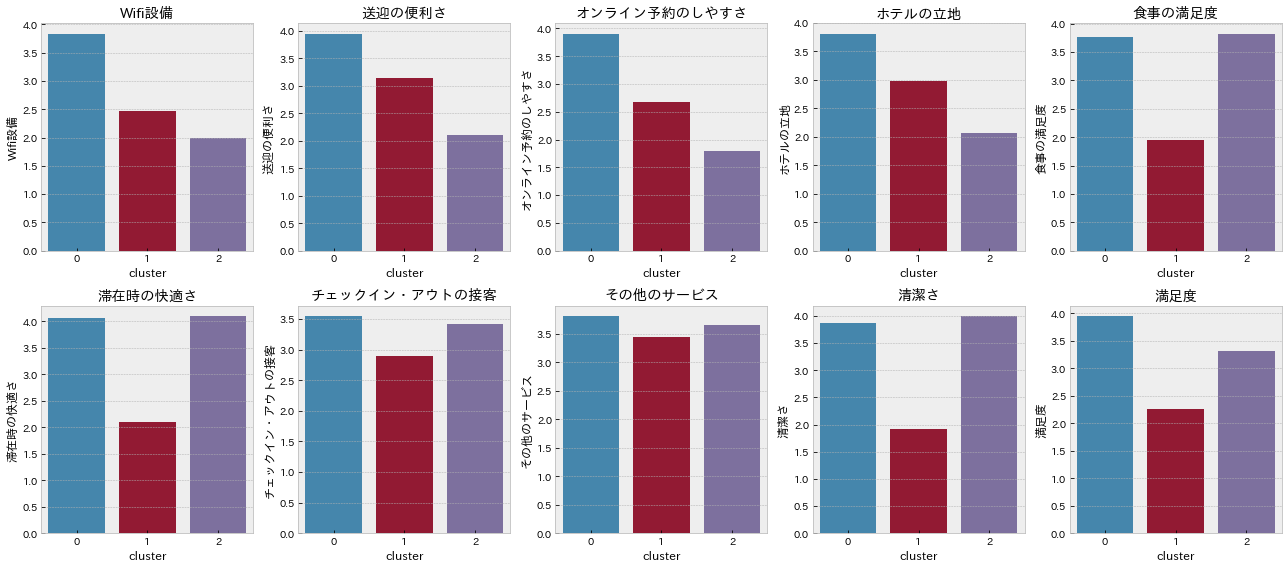

In [ ]:
#各変数ごとに可視化
plt.figure(figsize=(18,8))

for i , col in enumerate(median.columns):
  plt.subplot(2, 5, i+1)
  plt.title(f"{col}")
  sns.barplot(x=median.index, y=median[col])
  plt.tight_layout()

＜答えのまとめ＞

い1. 他のクラスタと比較して全体的に各評点が高い傾向がある。また、満足度も高い。他クラスタと相対的に見て、満足度の高い高評価レビュークラスタ。

い2. 全体の評価項目が相対的に低い低評価レビュークラスタ。満足度も最も低い。満足度が 2 番目に高いクラスタと比較すると、「送迎の便利さ」「オンライン予約のしやすさ」「ホテルの立地」について、評点が高いクラスタである。

い5. 満足度が最も低いクラスタと比較すると、「食事の満足度」「滞在時の快適さ」「清潔さ」の評点が高い。2 番目に全体的な評価の良いクラスタだが、評価に偏りが目立つ。ホテル内のサービスに高評価のクラスタ。

### 主成分分析による可視化
主成分分析も併用して用い、クラスタ毎の傾向を可視化する。  


In [ ]:
# 主成分分析 : 実行してください 
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [ ]:
# 主成分分析 : 実行してください 
df_numeric = df.select_dtypes(include='number')
x = df_numeric.drop(['年齢', '満足度'], axis=1)

scaler = StandardScaler()

x_scaled = scaler.fit_transform(x)

In [ ]:
# 主成分分析 : 実行してください 
pca = PCA(n_components=3, random_state=0)
feature = pca.fit_transform(x_scaled)

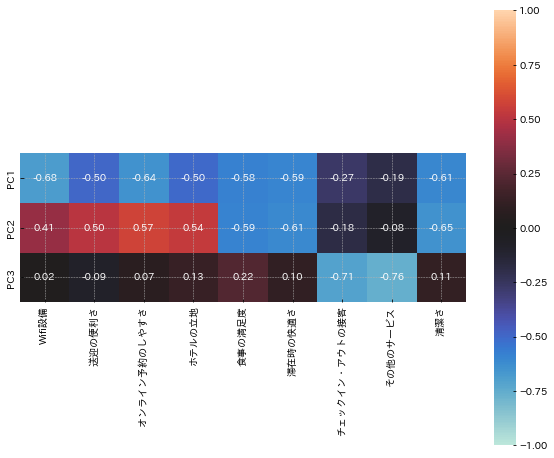

In [ ]:
# 主成分分析 : 実行してください 
cols = df_numeric.columns.drop(['年齢', '満足度'])

factor_loading = pca.components_ * np.c_[np.sqrt(pca.explained_variance_)]

df_factor_loading = pd.DataFrame(
    factor_loading,
    index=[f'PC{x+1}' for x in range(len(factor_loading))],
    columns=cols
)

sns.heatmap(df_factor_loading.head(3), vmax=1.0, center=0.0, vmin=-1.0, square=True, annot=True, fmt='.2f');

主成分はそれぞれ、以下のように定義できる。  

- 第一主成分 : 総合評価  
- 第二主成分 : ホテルの環境評価  
- 第三主成分 : 接客の評価  

クラスタと満足度がそれぞれのサンプル毎で判別ができるように、求めた第一主成分と第二主成分をそれぞれ、x 軸 y 軸として可視化する。  

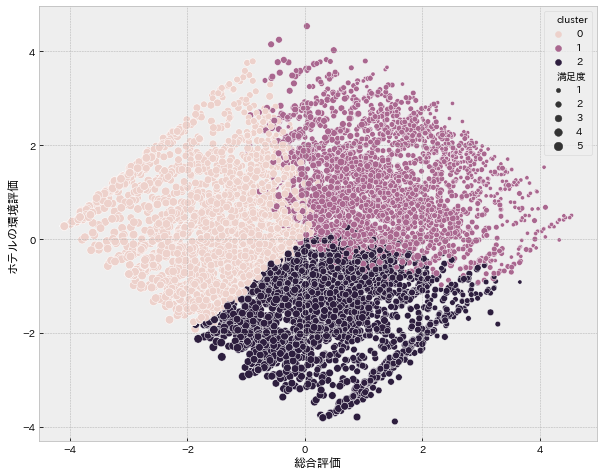

In [ ]:
# 主成分分析 : 実行してください
feature_df = pd.DataFrame(feature, columns=['総合評価', 'ホテルの環境評価', '接客の評価'])
new_data = pd.concat([df_clustering, feature_df], axis=1)

sns.scatterplot(x='総合評価', y='ホテルの環境評価', hue='cluster', size='満足度', data=new_data);

上記の様に、各クラスタは基準を持って、　3　つのグループに分割できることが分かる。特に第二主成分によって、クラスタ 1, 2 は分割可能に伺える。  
よって、大枠では、`Wifi 設備`、`送迎の便利さ`、`オンライン予約のしやすさ`、`ホテルの立地`の評点群、または、`食事の満足度`、`滞在時の快適さ`、`清潔さ`の評点群のどちらかへに評価が偏る傾向がある事がわかる。  


### クラスタの代表値の比較による要因の特定と施策の考案   
→ 該当する問題：**Q 5**   

ここまでで、大枠の傾向と、全体傾向としての項目の重要度を順位付けて判断することができた。  
先程、クラスタリングにより分けたクラスタ毎に傾向より詳しく読み取り、具体的な施策を考案するまでを分析する。  
基本的な方針として、各クラスタの特徴を踏まえた上で、各クラスタ毎でも共通する項目、逆に偏りのある項目、クラスタ内で目立つ方よりに注目し分析を進める。  

まずは各クラスタの相関分析からおこなう。  

以下、全クラスターを取得

In [ ]:
# 各クラスタのデータを取得してください 
df_cluster0 = groups.get_group(0)
df_cluster1 = groups.get_group(1)
df_cluster2 = groups.get_group(2)

In [ ]:
# クラスタ 0 （df_cluster0）の相関

df_cluster_0 = df_cluster0.reset_index(drop=True)
df_cluster_0.corr()

,年齢,Wifi設備,送迎の便利さ,オンライン予約のしやすさ,ホテルの立地,食事の満足度,滞在時の快適さ,チェックイン・アウトの接客,その他のサービス,清潔さ,満足度,cluster
年齢,1.000000,-0.077889,0.098356,-0.027737,0.091296,-0.165332,0.055639,0.035964,-0.027373,-0.148246,-0.077069,NaN
Wifi設備,-0.077889,1.000000,0.156243,0.525603,0.188610,-0.020004,0.027057,0.070501,0.146260,0.038879,0.523217,NaN
送迎の便利さ,0.098356,0.156243,1.000000,0.228148,0.353015,-0.066174,-0.039892,0.022687,-0.030470,-0.063735,-0.017372,NaN
オンライン予約のしやすさ,-0.027737,0.525603,0.228148,1.000000,0.295593,-0.066043,-0.127429,-0.047818,-0.033924,-0.144599,0.122673,NaN
ホテルの立地,0.091296,0.188610,0.353015,0.295593,1.000000,-0.074376,-0.037110,-0.056352,-0.032222,-0.073591,0.033085,NaN
食事の満足度,-0.165332,-0.020004,-0.066174,-0.066043,-0.074376,1.000000,0.207994,-0.026430,-0.042728,0.294435,0.296867,NaN
滞在時の快適さ,0.055639,0.027057,-0.039892,-0.127429,-0.037110,0.207994,1.000000,0.145430,0.062039,0.350649,0.677124,NaN
チェックイン・アウトの接客,0.035964,0.070501,0.022687,-0.047818,-0.056352,-0.026430,0.145430,1.000000,0.200061,0.085663,0.114328,NaN
その他のサービス,-0.027373,0.146260,-0.030470,-0.033924,-0.032222,-0.042728,0.062039,0.200061,1.000000,0.054034,0.305411,NaN
清潔さ,-0.148246,0.038879,-0.063735,-0.144599,-0.073591,0.294435,0.350649,0.085663,0.054034,1.000000,0.459472,NaN


In [ ]:
# クラスタ 1 （df_cluster1）の相関

df_cluster_1 = df_cluster1.reset_index(drop=True)
df_cluster_1.corr()

,年齢,Wifi設備,送迎の便利さ,オンライン予約のしやすさ,ホテルの立地,食事の満足度,滞在時の快適さ,チェックイン・アウトの接客,その他のサービス,清潔さ,満足度,cluster
年齢,1.000000,-0.039098,-0.010652,-0.010962,-0.018519,0.015250,0.116795,-0.107088,-0.142853,0.005702,0.019575,NaN
Wifi設備,-0.039098,1.000000,-0.006364,0.556372,-0.074596,0.034707,0.009939,0.022115,0.147859,-0.007358,0.581972,NaN
送迎の便利さ,-0.010652,-0.006364,1.000000,0.168067,0.211424,0.031842,-0.000649,0.185112,0.110529,0.066830,-0.005265,NaN
オンライン予約のしやすさ,-0.010962,0.556372,0.168067,1.000000,0.199005,-0.017497,-0.040264,-0.015972,-0.028982,-0.052194,0.238010,NaN
ホテルの立地,-0.018519,-0.074596,0.211424,0.199005,1.000000,0.026689,0.018437,-0.042929,0.005471,0.039246,-0.011491,NaN
食事の満足度,0.015250,0.034707,0.031842,-0.017497,0.026689,1.000000,0.338210,-0.109814,-0.085948,0.559440,0.384673,NaN
滞在時の快適さ,0.116795,0.009939,-0.000649,-0.040264,0.018437,0.338210,1.000000,-0.103391,-0.132638,0.374918,0.648249,NaN
チェックイン・アウトの接客,-0.107088,0.022115,0.185112,-0.015972,-0.042929,-0.109814,-0.103391,1.000000,0.238381,-0.038596,-0.054650,NaN
その他のサービス,-0.142853,0.147859,0.110529,-0.028982,0.005471,-0.085948,-0.132638,0.238381,1.000000,-0.064506,0.199364,NaN
清潔さ,0.005702,-0.007358,0.066830,-0.052194,0.039246,0.559440,0.374918,-0.038596,-0.064506,1.000000,0.402582,NaN


In [ ]:
# クラスタ 2 （df_cluster2）の相関

df_cluster_2 = df_cluster2.reset_index(drop=True)
df_cluster_2.corr()

,年齢,Wifi設備,送迎の便利さ,オンライン予約のしやすさ,ホテルの立地,食事の満足度,滞在時の快適さ,チェックイン・アウトの接客,その他のサービス,清潔さ,満足度,cluster
年齢,1.000000,-0.037464,0.050106,-0.009550,-0.158525,-0.205846,-0.034836,0.058001,-0.052324,-0.161320,-0.112339,NaN
Wifi設備,-0.037464,1.000000,0.006930,0.330394,-0.021061,0.091930,-0.046930,-0.118784,-0.131782,-0.002086,0.507588,NaN
送迎の便利さ,0.050106,0.006930,1.000000,0.090068,0.189369,0.096877,0.102668,0.076285,-0.013502,0.150604,0.048051,NaN
オンライン予約のしやすさ,-0.009550,0.330394,0.090068,1.000000,0.049370,0.070997,0.067522,0.020097,-0.045886,0.070418,0.179737,NaN
ホテルの立地,-0.158525,-0.021061,0.189369,0.049370,1.000000,0.148407,0.006597,-0.112917,-0.080455,0.117448,0.014312,NaN
食事の満足度,-0.205846,0.091930,0.096877,0.070997,0.148407,1.000000,0.173501,-0.067617,0.020216,0.309728,0.362322,NaN
滞在時の快適さ,-0.034836,-0.046930,0.102668,0.067522,0.006597,0.173501,1.000000,0.119526,0.064899,0.306493,0.635758,NaN
チェックイン・アウトの接客,0.058001,-0.118784,0.076285,0.020097,-0.112917,-0.067617,0.119526,1.000000,0.220925,0.045112,0.000317,NaN
その他のサービス,-0.052324,-0.131782,-0.013502,-0.045886,-0.080455,0.020216,0.064899,0.220925,1.000000,0.072579,0.194367,NaN
清潔さ,-0.161320,-0.002086,0.150604,0.070418,0.117448,0.309728,0.306493,0.045112,0.072579,1.000000,0.401670,NaN


顧客の属性による評価の違いも考慮して、定性的に代表値の比較を行う。  
代表値には中央値を使用する。  

In [ ]:
# クラスタ 0 の満足度内訳 : 実行してください 
df_cluster0['満足度'].value_counts()

4    2165
3     763
5     646
2      40
Name: 満足度, dtype: int64

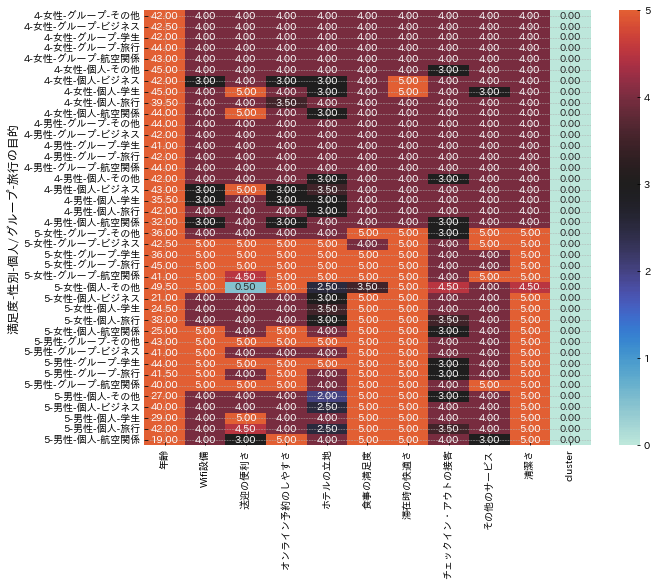

In [ ]:
#クラスタ 0 （cluster 0 ）内の満足度高評価サンプルの代表値（中央値）比較
# 「満足度が 4 または 5」という条件を追記してください。  
_df = df_cluster0.groupby(['満足度','性別', '個人/グループ', '旅行の目的']).median().query('満足度>=4')

sns.heatmap(_df, 
            vmin=0,
            vmax=5,
            center=3,
            annot=True,
            fmt='.2f');

In [ ]:
# クラスタ 1 の満足度内訳  : 実行してください 
df_cluster1['満足度'].value_counts()

2    1680
3    1112
1     392
4      47
Name: 満足度, dtype: int64

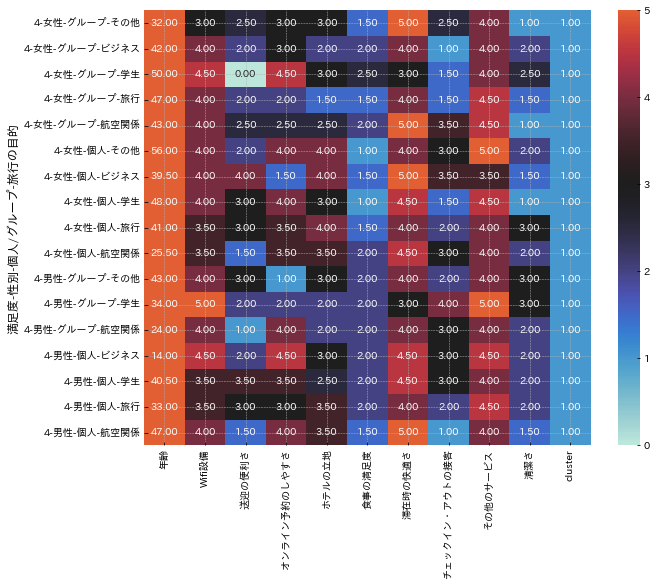

In [ ]:
#クラスタ 1 （cluster 1 ）内の満足度高評価サンプルの代表値（中央値）比較
# 「満足度が 4 または 5」という条件を追記してください。  
_df = df_cluster1.groupby(['満足度','性別', '個人/グループ', '旅行の目的']).median().query('満足度>=4')

sns.heatmap(_df, 
            vmin=0,
            vmax=5,
            center=3,
            annot=True,
            fmt='.2f');

In [ ]:
# クラスタ 2 の満足度内訳  : 実行してください 
df_cluster2['満足度'].value_counts()

3    1691
4    1137
2     256
5      70
1       1
Name: 満足度, dtype: int64

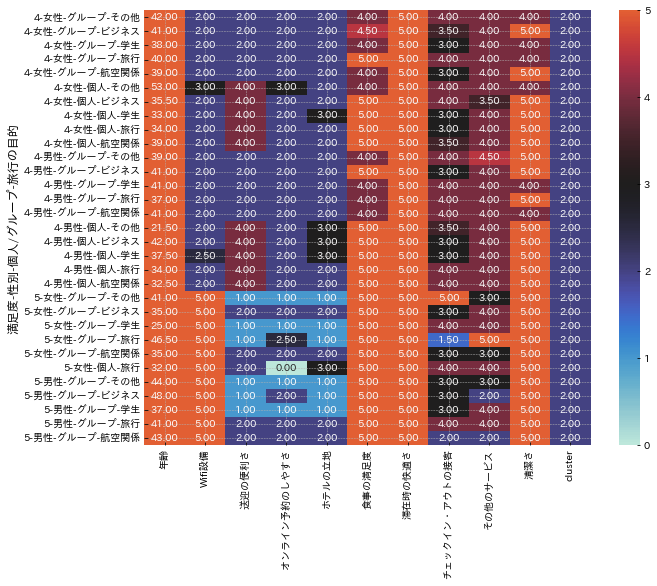

In [ ]:
#クラスタ 2 （cluster 2 ）内の満足度高評価サンプルの代表値（中央値）比較
# 「満足度が 4 または 5」という条件を追記してください。  
_df = df_cluster2.groupby(['満足度','性別', '個人/グループ', '旅行の目的']).median().query('満足度>=4')

sns.heatmap(_df, 
            vmin=0,
            vmax=5,
            center=3,
            annot=True,
            fmt='.2f');

各クラスタにおいて、満足度が高評価であるサンプルに共通しているのは、`Wifi 設備`、`滞在時の快適さ`の評点が高いことである。  
どの様なお客様に対しても共通して効果が大きいのは上記 2 つに対して改善策を講じることだと判断できる。  



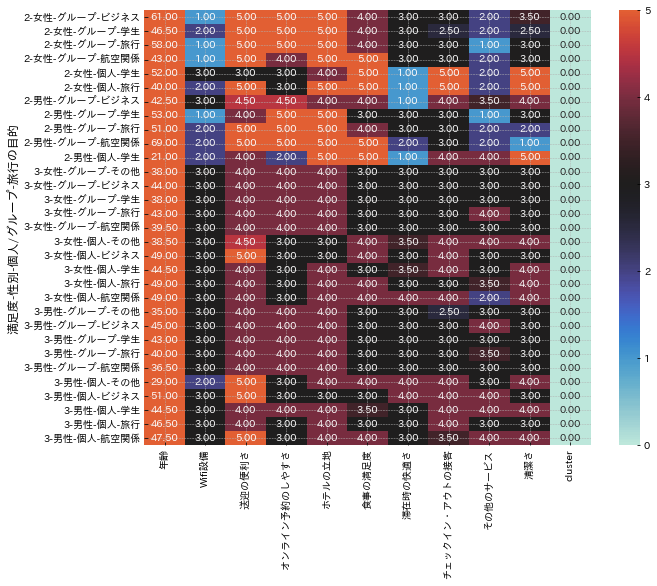

In [ ]:
#クラスタ 0 内の満足度低評価（満足度 1,2,3）サンプルの代表値（中央値）比較  
# 満足度 4,5 の場合の実装を見本に実装してみてください。  

_df = df_cluster0.groupby(['満足度','性別', '個人/グループ', '旅行の目的']).median().query('満足度<=3')

sns.heatmap(_df, 
            vmin=0,
            vmax=5,
            center=3,
            annot=True,
            fmt='.2f');

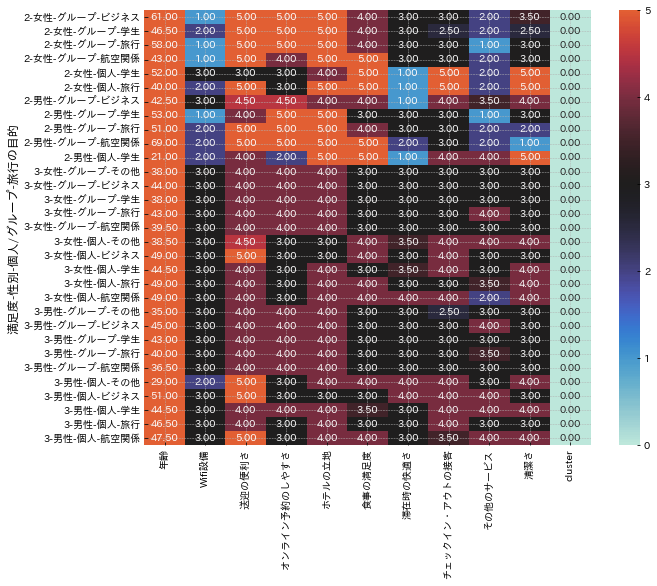

In [ ]:
#クラスタ 1 内の満足度低評価（満足度 1,2,3）サンプルの代表値（中央値）比較  
# 満足度 4,5 の場合の実装を見本に実装してみてください。  

_df = df_cluster0.groupby(['満足度','性別', '個人/グループ', '旅行の目的']).median().query('満足度<=3')

sns.heatmap(_df, 
            vmin=0,
            vmax=5,
            center=3,
            annot=True,
            fmt='.2f');

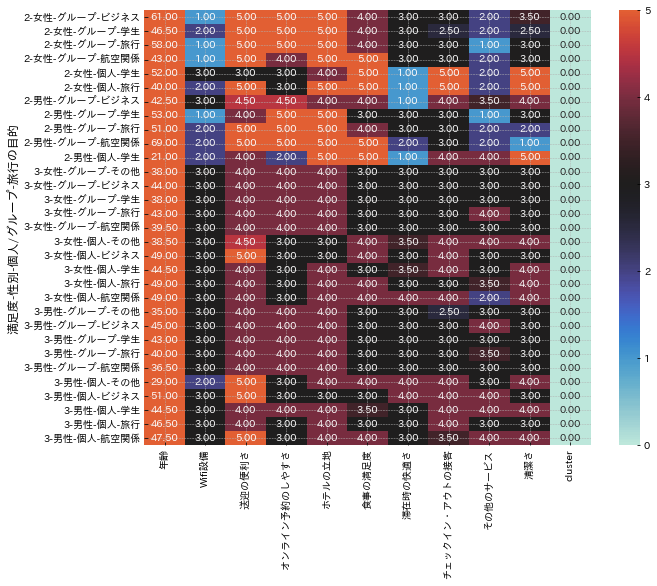

In [ ]:
#クラスタ 2 内の満足度低評価（満足度 1,2,3）サンプルの代表値（中央値）比較  
# 満足度 4,5 の場合の実装を見本に実装してみてください。  

_df = df_cluster0.groupby(['満足度','性別', '個人/グループ', '旅行の目的']).median().query('満足度<=3')

sns.heatmap(_df, 
            vmin=0,
            vmax=5,
            center=3,
            annot=True,
            fmt='.2f');

上記それぞれの結果を踏まえ各要因を以下の 4 つに分類する。  

1. 優先度高く改善を行う項目  
2. 第二優先項目として改善を行う項目  
3. 現在のサービス品質の継続を目指す項目  
4. 優先度を下げるまたは考慮しない項目      


1. 優先度高く改善を行う項目    
→ wifi設備、滞在時の快適さ

2. 第二優先項目として改善を行う項目    
→ 食事の満足度、清潔さ

  
3. 現在のサービス品質の維持を目指す項目   
→ 送迎の便利さ、チェックイン・アウトの接客、その他のサービス


4. 優先度を下げるまたは考慮しない項目  
→ ホテルの立地、オンライン予約のしやすさ

< テストの正解選択肢や、読み取れたことをまとめてください >

※上記の通り

## まとめパート  

本分析では、hotel_reviews.csv を使用して、顧客の満足度に寄与している要因を見つけ出し、満足度向上のための施策を考え、リピート顧客を増やすことを目的として分析を行った。  

データ分析の結論として以下の実施を提案する。  

- 個人用客室の Wifi 設備の確認と必要に応じて通信設備の見直し  
- 滞在時の快適さに関する追加分析  
- 食事の満足度と清潔さに関する追加分析  


---
---

#### ipynb を PDF に変換する方法  
**ファイル > 印刷 > PDF で保存**と実行する  


